## 2. Insights Discovery

In [1]:
# Import the necessary library for mounting Google Drive
from google.colab import drive

# Mount Google Drive to access files and directories
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import the necessary libraries
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
dogs_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ML_FINAL_PROJECT/dogs_data.csv')

In [4]:
# Display a few records
dogs_df.head(5)

,ImageIn,NamesIn
0,[[[180 144 104]\n [180 146 106]\n [174 140 1...,african_hunting_dog
1,[[[216 202 180]\n [211 199 177]\n [200 188 1...,african_hunting_dog
2,[[[168 155 136]\n [154 141 122]\n [148 135 1...,african_hunting_dog
3,[[[115 133 78]\n [ 92 138 71]\n [ 87 133 ...,african_hunting_dog
4,[[[230 235 231]\n [202 211 204]\n [226 230 2...,african_hunting_dog


In [5]:
# Number of Unique Breeds in Dataset
print('Type of breeds:', dogs_df['NamesIn'].nunique())

Type of breeds: 120


There are 120 different type of breeds spread across ~20K images.

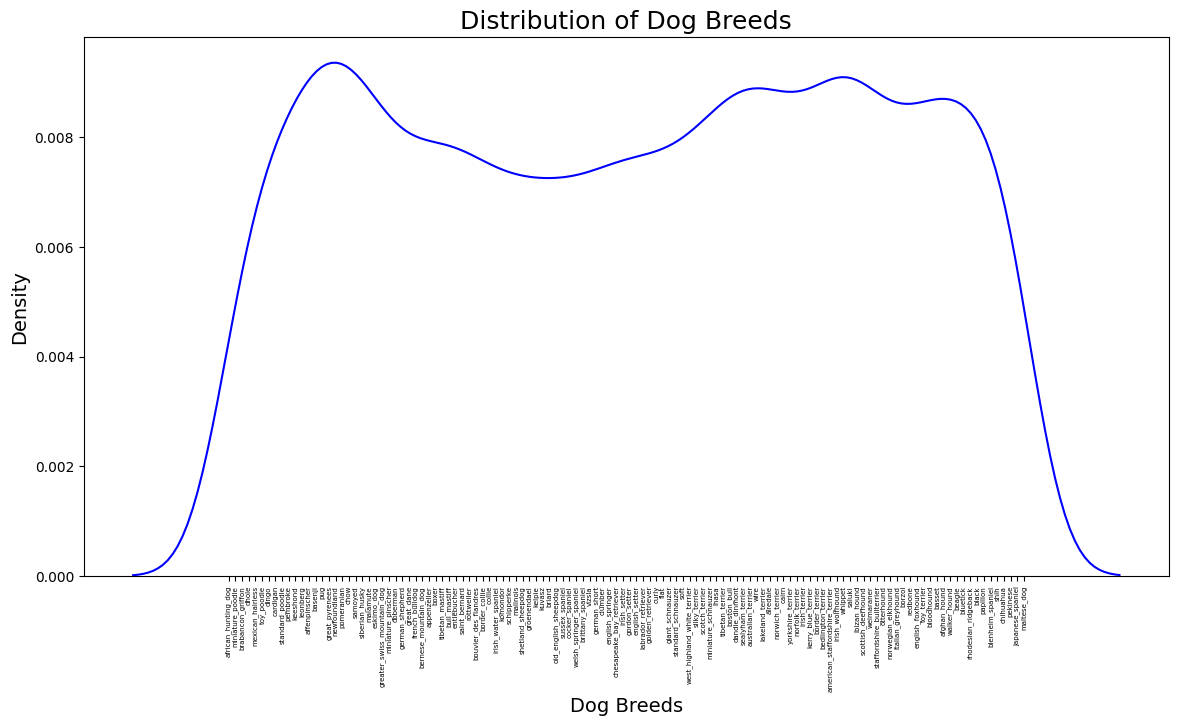

In [6]:
plt.figure(figsize=(14, 7))  # Increase the figure size

# Convert categorical variable to numeric representation
dogs_df['BreedID'] = pd.factorize(dogs_df['NamesIn'])[0]

# Plot the KDE plot using the converted numeric variable
sns.kdeplot(data=dogs_df, x='BreedID', color='blue')

plt.title('Distribution of Dog Breeds', fontsize=18)  # Add a title with increased font size
plt.xlabel('Dog Breeds', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Density', fontsize=14)  # Increase font size for y-axis label

plt.xticks(ticks=range(len(dogs_df['NamesIn'].unique())), labels=dogs_df['NamesIn'].unique(), rotation=90, fontsize=5)  # Adjust x-axis ticks and labels

plt.show()  # Display the plot


It is important to look at the different breeds of dogs to make sure if dataset is biased towards a specific breed type.

It can be noted from above that all 120 breeds have comparable number of images. Dataset is not biased towards any breed of dogs.

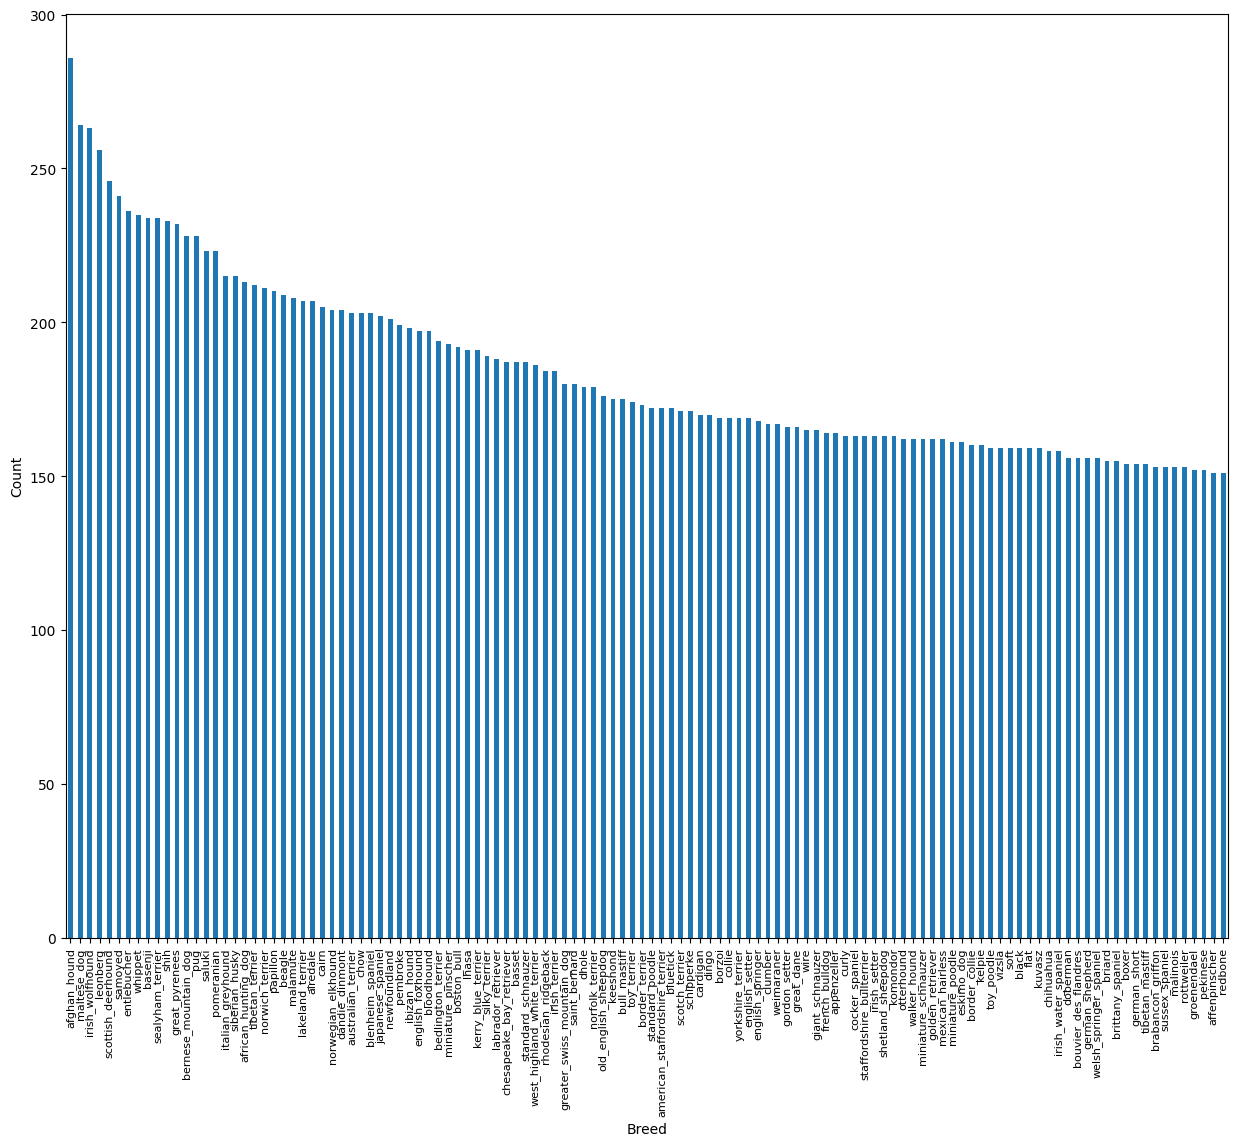

In [7]:
# Create a larger figure
plt.figure(figsize=(15, 12))

# Histogram of the breed names
dogs_df['NamesIn'].value_counts().plot(kind='bar')
plt.xlabel('Breed')
plt.ylabel('Count')

plt.xticks(rotation=90, fontsize=8)  # Rotate x-axis labels and adjust font size

plt.show()


<ipython-input-8-62d290293946>:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  img_pixels = np.fromstring(img_pixels.strip('[]'), sep=' ')


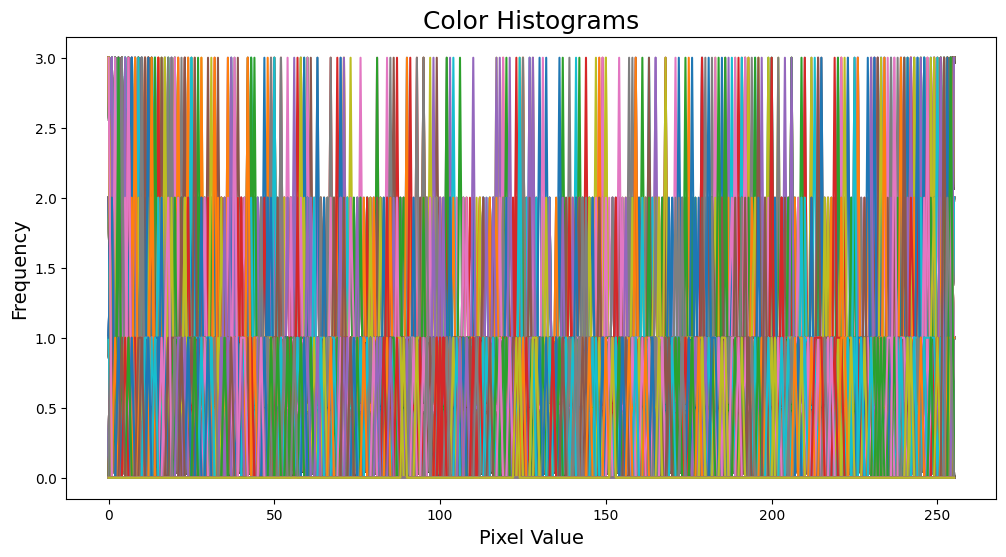

In [8]:
# Compute color histogram features
color_histograms = []

for img_pixels in dogs_df['ImageIn']:
    img_pixels = np.fromstring(img_pixels.strip('[]'), sep=' ')
    img_pixels = img_pixels.reshape(-1, 3)
    histogram = np.histogram(img_pixels, bins=256, range=(0, 256))[0]
    color_histograms.append(histogram)

# Plot color histograms
plt.figure(figsize=(12, 6))  # Adjust the figure size

for histogram in color_histograms:
    plt.plot(histogram)

plt.title('Color Histograms', fontsize=18)  # Add a title with increased font size
plt.xlabel('Pixel Value', fontsize=14)  # Increase font size for x-axis label
plt.ylabel('Frequency', fontsize=14)  # Increase font size for y-axis label

plt.show()  # Display the plot


Further, color histograms can give us idea if there is any dominate color of breed which might impact the model training, but it turned out that dataset remains neutral towards the color distribution. 